# Distribution Testing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import scipy.stats as stats
from scipy.interpolate import interp1d
import pickle
import altair as alt
import math

In [2]:
alt.data_transformers.enable('vegafusion')

DataTransformerRegistry.enable('vegafusion')

### Plot Untransformed and natural log SWE distributions per cluster:

In [3]:
df = pickle.load(open('../data/snv_dataframes/snv_temp_precip_cluster_gdf.pkl','rb'))

In [62]:
df_reset = df[df['cluster']==0].reset_index()

cluster0 = alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 0',width=200,height=200)

df_reset = df[df['cluster']==1].reset_index()
cluster1 = alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 1',width=200,height=200)

df_reset = df[df['cluster']==2].reset_index()
cluster2 = alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 2',width=200,height=200)

df_reset = df[df['cluster']==3].reset_index()
cluster3 = alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 3',width=200,height=200)

df_reset = df[df['cluster']==4].reset_index()
cluster4 = alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 4',width=200,height=200)

combined = alt.hconcat(cluster0, cluster1, cluster2, cluster3, cluster4)
combined

alt.HConcatChart(...)

In [84]:
df_reset = df[df['cluster']==0].reset_index()
cluster0 = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 0',width=200,height=200)

df_reset = df[df['cluster']==1].reset_index()
cluster1 = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 1',width=200,height=200)

df_reset = df[df['cluster']==2].reset_index()
cluster2 = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 2',width=200,height=200)

df_reset = df[df['cluster']==3].reset_index()
cluster3 = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 3',width=200,height=200)

df_reset = df[df['cluster']==4].reset_index()
cluster4 = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=20),
    y='count()',
).properties(title='Cluster 4',width=200,height=200)

combined = alt.hconcat(cluster0, cluster1, cluster2, cluster3, cluster4)
combined

alt.HConcatChart(...)

### Plot Distributions of test sites:

In [284]:
site2 = '737_CO_SNTL'
site1 = '380_CO_SNTL'

In [7]:
swe_real = df.loc[pd.IndexSlice[site1],'station_swe']

In [111]:
df_reset = df.loc[pd.IndexSlice[site1]]
site1_unt= alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Untransformed SWE',width=200,height=200)

df_reset = df.loc[pd.IndexSlice[site1]]
site1_ln = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Natural Log of SWE',width=200,height=200)

combined = alt.hconcat(site1_unt, site1_ln)
combined

alt.HConcatChart(...)

In [112]:
df_reset = df.loc[pd.IndexSlice[site2]]
site2_unt= alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Untransformed SWE',width=200,height=200)

df_reset = df.loc[pd.IndexSlice[site2]]
site2_ln = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Natural Log of SWE',width=200,height=200)

combined = alt.hconcat(site2_unt, site2_ln)
combined

alt.HConcatChart(...)

In [113]:
np.sqrt(32)

5.656854249492381

### Predict SWE at Butte using untransformed data from Schofield Pass:

In [114]:
swe_pred = (df.loc[pd.IndexSlice[site2],'station_n'] * df.loc[pd.IndexSlice[site1],'reanalysis_swe'].std()) + df.loc[pd.IndexSlice[site1],'reanalysis_swe'].mean()

In [115]:
df_swe_pred = pd.DataFrame(swe_real)

In [116]:
df_swe_pred['swe_pred'] = swe_pred

In [117]:
df_swe_pred['difference'] = df_swe_pred['station_swe'] - df_swe_pred['swe_pred']

In [118]:
df_swe_pred['difference'].mean()

-0.07061502593994146

In [119]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_swe_pred).mark_circle().encode(
        x = alt.X('station_swe').title('Butte SNOTEL SWE (m)'), 
        y = alt.Y('swe_pred').title('Butte SNOTEL SWE predicted with Schofield Pass SNVs (m)') 
    ).properties(title='Predicted SWE from Untransformed Values')

combined = (station_predict + line2 ) 
combined

alt.LayerChart(...)

In [122]:
print('R value: ', np.corrcoef(df_swe_pred['station_swe'], df_swe_pred['swe_pred'])[0,1])

R value:  0.9168102917716948


### Predict SWE using log values:

In [19]:
site2 = '737_CO_SNTL'
site1 = '380_CO_SNTL'

In [20]:
swe_real = df.loc[pd.IndexSlice[site1],'station_swe']

In [21]:
swe_pred_log = (df.loc[pd.IndexSlice[site2],'log_station_n'] * df.loc[pd.IndexSlice[site1],'log_reanalysis_swe'].std()) + df.loc[pd.IndexSlice[site1],'log_reanalysis_swe'].mean()

In [22]:
df_swe_pred_log = pd.DataFrame(swe_real)

In [23]:
df_swe_pred_log['swe_pred_log'] = swe_pred_log

In [25]:
df_swe_pred_log['swe_pred_log_trans'] = math.e**df_swe_pred_log['swe_pred_log']

In [26]:
df_swe_pred_log['difference'] = df_swe_pred_log['station_swe'] - df_swe_pred_log['swe_pred_log_trans']

In [27]:
df_swe_pred_log['difference'].mean()

-0.07259792759310517

In [219]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_swe_pred).mark_circle().encode(
        x = alt.X('station_swe').title('Butte SNOTEL SWE (m)'), #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]),
        y = alt.Y('swe_pred').title('Butte SNOTEL SWE predicted with Schofield Pass SNVs (m)'),
    color=alt.value('#000000') #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]).scale(domain=[-5,5]).scale(domain=[0,2500]),
    ).properties(title='Predicted SWE from Untransformed Values')

station_predict_log = alt.Chart(df_swe_pred_log).mark_circle().encode(
        x = alt.X('station_swe').title('Butte SNOTEL SWE (m)'), #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]),
        y = alt.Y('swe_pred_log_trans').title('Butte SNOTEL SWE predicted with Schofield Pass Ln(SNVs) (m)') #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]).scale(domain=[-5,5]).scale(domain=[0,2500]),
    ).properties(title='Predicted SWE')

combined = (station_predict + line2 + station_predict_log) # + annotation
#combined.save('../figures/swe_predicted.png')
combined

alt.LayerChart(...)

In [ ]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_swe_pred_log).mark_circle().encode(
        x = alt.X('station_swe').title('Butte SNOTEL SWE (m)'), #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]),
        y = alt.Y('swe_pred_log_trans').title('Butte SNOTEL SWE predicted with Schofield Pass Ln(SNVs) (m)') #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]).scale(domain=[-5,5]).scale(domain=[0,2500]),
    ).properties(title='Predicted SWE')

combined = (station_predict + line2) # + annotation
#combined.save('../figures/swe_predicted.png')
combined

In [123]:
print('R value: ', np.corrcoef(df_swe_pred_log['station_swe'], df_swe_pred_log['swe_pred_log_trans'])[0,1])

R value:  0.9172905061197217


### Predict SWE with Quantile Mapping:

In [365]:
site2 = '737_CO_SNTL'
site1 = '380_CO_SNTL'

In [366]:
cdf_site1 = df.loc[pd.IndexSlice[site1]]
cdf_site2 = df.loc[pd.IndexSlice[site2]]

In [367]:
cdf_site2 = cdf_site2.sort_values('station_swe')
cdf_site1 = cdf_site1.sort_values('reanalysis_swe')

In [368]:
count2, bins_count2 = np.histogram(cdf_site2['station_swe'], bins=6)
count1, bins_count1 = np.histogram(cdf_site1['reanalysis_swe'], bins=6)

In [369]:
pdf1 = count1 / sum(count1)
pdf2 = count2 / sum(count2)

In [370]:
cdf1 = np.cumsum(pdf1) 
cdf2 = np.cumsum(pdf2) 

In [371]:
cdf_site1['station_swe'].min()

0.1651

In [372]:
np.nanmin(cdf_site1['station_swe'])

0.1651

In [373]:
# Untransformed Theoretical Normal PDF
mu_1 = cdf_site1['station_swe'].mean()
sigma_1 = cdf_site1['station_swe'].std()

x_1 = np.linspace(cdf_site1['station_swe'].min(), cdf_site1['station_swe'].max(), 101)
pdf_1 = stats.norm.pdf(x_1, mu_1, sigma_1)
pdf_1 = pdf_1 / np.sum(pdf_1)
cdf_1 = np.cumsum(pdf_1)

mu_2 = cdf_site2['station_swe'].mean()
sigma_2 = cdf_site2['station_swe'].std()

x_2 = np.linspace(cdf_site2['station_swe'].min(), cdf_site2['station_swe'].max(), 101)
pdf_2 = stats.norm.pdf(x_2, mu_2, sigma_2)
pdf_2 = pdf_2 / np.sum(pdf_2)
cdf_2 = np.cumsum(pdf_2)


# Theoretical Natural Log Normal PDF
mu_1_log = np.log(cdf_site1['station_swe']).mean()
sigma_1_log = np.log(cdf_site1['station_swe']).std()

x_1_log = np.log(np.linspace(cdf_site1['station_swe'].min(), cdf_site1['station_swe'].max(), 101))
pdf_1_log = stats.norm.pdf(x_1_log, mu_1_log, sigma_1_log)
pdf_1_log = pdf_1_log / np.sum(pdf_1_log)
cdf_1_log = np.cumsum(pdf_1_log)

mu_2_log = np.log(cdf_site2['station_swe']).mean()
sigma_2_log = np.log(cdf_site2['station_swe']).std()

x_2_log = np.log(np.linspace(cdf_site2['station_swe'].min(), cdf_site2['station_swe'].max(), 101))
pdf_2_log = stats.norm.pdf(x_2_log, mu_2_log, sigma_2_log)
pdf_2_log = pdf_2_log / np.sum(pdf_2_log)
cdf_2_log = np.cumsum(pdf_2_log)

In [374]:
x_1

array([0.1651  , 0.169545, 0.17399 , 0.178435, 0.18288 , 0.187325,
       0.19177 , 0.196215, 0.20066 , 0.205105, 0.20955 , 0.213995,
       0.21844 , 0.222885, 0.22733 , 0.231775, 0.23622 , 0.240665,
       0.24511 , 0.249555, 0.254   , 0.258445, 0.26289 , 0.267335,
       0.27178 , 0.276225, 0.28067 , 0.285115, 0.28956 , 0.294005,
       0.29845 , 0.302895, 0.30734 , 0.311785, 0.31623 , 0.320675,
       0.32512 , 0.329565, 0.33401 , 0.338455, 0.3429  , 0.347345,
       0.35179 , 0.356235, 0.36068 , 0.365125, 0.36957 , 0.374015,
       0.37846 , 0.382905, 0.38735 , 0.391795, 0.39624 , 0.400685,
       0.40513 , 0.409575, 0.41402 , 0.418465, 0.42291 , 0.427355,
       0.4318  , 0.436245, 0.44069 , 0.445135, 0.44958 , 0.454025,
       0.45847 , 0.462915, 0.46736 , 0.471805, 0.47625 , 0.480695,
       0.48514 , 0.489585, 0.49403 , 0.498475, 0.50292 , 0.507365,
       0.51181 , 0.516255, 0.5207  , 0.525145, 0.52959 , 0.534035,
       0.53848 , 0.542925, 0.54737 , 0.551815, 0.55626 , 0.560

Text(0, 0.5, 'Probability')

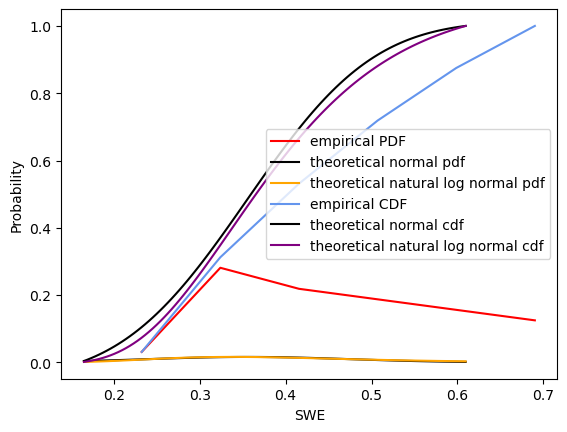

In [384]:
# plotting PDF and CDF 
plt.plot(bins_count1[1:], pdf1, color="red", label="empirical PDF") 
plt.plot(x_1,pdf_1,'k', label='theoretical normal pdf')
plt.plot(x_1,pdf_1_log,'orange',label='theoretical natural log normal pdf')

plt.plot(bins_count1[1:], cdf1, 'cornflowerblue', label="empirical CDF")
plt.plot(x_1,cdf_1,'k', label='theoretical normal cdf')
plt.plot(x_1, cdf_1_log,'purple',label='theoretical natural log normal cdf')

plt.legend() 
plt.xlabel('SWE')
plt.ylabel('Probability')

ValueError: x and y must have same first dimension, but have shapes (6,) and (101,)

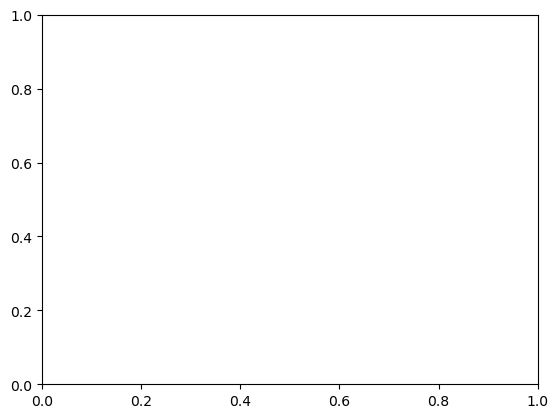

In [386]:
plt.plot(cdf1,cdf_1)

Text(0, 0.5, 'Probability')

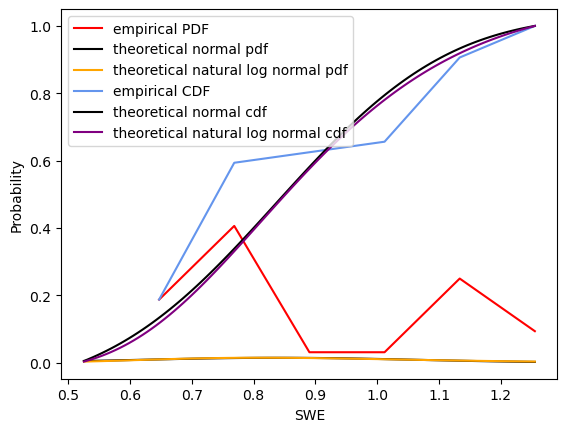

In [385]:
# plotting PDF and CDF 
plt.plot(bins_count2[1:], pdf2, color="red", label="empirical PDF") 
plt.plot(x_2,pdf_2,'k', label='theoretical normal pdf')
plt.plot(x_2,pdf_2_log,'orange',label='theoretical natural log normal pdf')

plt.plot(bins_count2[1:], cdf2, 'cornflowerblue', label="empirical CDF")
plt.plot(x_2,cdf_2,'k', label='theoretical normal cdf')
plt.plot(x_2, cdf_2_log,'purple',label='theoretical natural log normal cdf')

plt.legend() 
plt.xlabel('SWE')
plt.ylabel('Probability')

In [235]:
cdf_site1[cdf_site1['reanalysis_swe'] == 0]['reanalysis_swe'] = 0.01
cdf_site1[cdf_site1['cdf'] == 0]['cdf'] = 0.01

In [236]:
cdf_site1.loc[cdf_site1.index==2020, 'cdf']

year
2020    0.53125
Name: cdf, dtype: float64

In [237]:
f = interp1d(cdf_site1['cdf'], cdf_site1['reanalysis_swe'])
swe_quant = f(cdf_site1.loc[cdf_site1.index==2020, 'cdf'].values)

In [238]:
pred_quant = []
for year in np.arange(1990,2021):
    pred_quant.append(f(cdf_site1.loc[cdf_site1.index==year, 'cdf'].values)[0])

pred_quant.append(np.nan)

/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/scipy/interpolate/_interpolate.py:712: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/scipy/interpolate/_interpolate.py:715: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


In [239]:
site1_compare = df.loc[pd.IndexSlice[site1]][['station_swe']]

In [240]:
site1_compare['pred_quant'] = pred_quant

In [241]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(site1_compare).mark_circle().encode(
        x = alt.X('station_swe').title('Butte SNOTEL SWE (m)'), #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]),
        y = alt.Y('pred_quant').title('Butte SNOTEL SWE predicted with Schofield Pass Quantile Mapping (m)') #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]).scale(domain=[-5,5]).scale(domain=[0,2500]),
    ).properties(title='Predicted SWE')

combined = (station_predict + line2)

combined

alt.LayerChart(...)

In [242]:
site1_compare['difference'] = site1_compare['station_swe'] - site1_compare['pred_quant']
df_swe_pred_log['difference'].mean()

0.05328185442364653

In [243]:
site1_compare_na = site1_compare.dropna()
print('R value: ', np.corrcoef(site1_compare_na['station_swe'], site1_compare_na['pred_quant'])[0,1])

R value:  0.6127373597476168


## Try with a second site:

### Plot Distributions of test sites:

In [169]:
site2 = '408_CO_SNTL'
site1 = '457_CO_SNTL'

In [170]:
swe_real = df.loc[pd.IndexSlice[site1],'station_swe']

In [171]:
df_reset = df.loc[pd.IndexSlice[site1]]
site1_unt= alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Untransformed SWE',width=200,height=200)

df_reset = df.loc[pd.IndexSlice[site1]]
site1_ln = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Natural Log of SWE',width=200,height=200)

combined = alt.hconcat(site1_unt, site1_ln)
combined

alt.HConcatChart(...)

In [172]:
df_reset = df.loc[pd.IndexSlice[site2]]
site2_unt= alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Untransformed SWE',width=200,height=200)

df_reset = df.loc[pd.IndexSlice[site2]]
site2_ln = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Natural Log of SWE',width=200,height=200)

combined = alt.hconcat(site2_unt, site2_ln)
combined

alt.HConcatChart(...)

In [113]:
np.sqrt(32)

5.656854249492381

### Predict SWE at Butte using untransformed data from Schofield Pass:

In [173]:
swe_pred = (df.loc[pd.IndexSlice[site2],'station_n'] * df.loc[pd.IndexSlice[site1],'reanalysis_swe'].std()) + df.loc[pd.IndexSlice[site1],'reanalysis_swe'].mean()

In [174]:
df_swe_pred = pd.DataFrame(swe_real)

In [175]:
df_swe_pred['swe_pred'] = swe_pred

In [176]:
df_swe_pred['difference'] = df_swe_pred['station_swe'] - df_swe_pred['swe_pred']

In [177]:
df_swe_pred['difference'].mean()

0.0779256101703644

In [178]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_swe_pred).mark_circle().encode(
        x = alt.X('station_swe').title('Butte SNOTEL SWE (m)'), #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]),
        y = alt.Y('swe_pred').title('Butte SNOTEL SWE predicted with Schofield Pass SNVs (m)') #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]).scale(domain=[-5,5]).scale(domain=[0,2500]),
    ).properties(title='Predicted SWE from Untransformed Values')

annotation = alt.Chart(df_swe_pred).mark_text(
    align='left',
    baseline='middle',
    fontSize = 20
).encode(
    text='A'
)

# text = base.mark_text(baseline="middle").encode(
#     text="num_cars:Q",
#     color=alt.condition(
#         alt.datum.num_cars > 100,
#         alt.value("black"),
#         alt.value("white"),
#     ),
# )

combined = (station_predict + line2 ) #+ annotation
#combined.save('../figures/swe_predicted.png')
combined

alt.LayerChart(...)

In [179]:
print('R value: ', np.corrcoef(df_swe_pred['station_swe'], df_swe_pred['swe_pred'])[0,1])

R value:  0.933018186875718


### Predict SWE using log values:

In [180]:
site2 = '408_CO_SNTL'
site1 = '457_CO_SNTL'

In [181]:
swe_real = df.loc[pd.IndexSlice[site1],'station_swe']

In [189]:
df.loc[pd.IndexSlice[site1],'log_reanalysis_swe']

year
1990   -0.741917
1991   -2.700082
1992   -0.846765
1993   -0.557219
1994   -0.944176
1995   -0.929883
1996   -0.313342
1997        -inf
1998   -0.663977
1999   -1.382302
2000   -0.327394
2001   -1.112306
2002   -1.106241
2003   -0.628109
2004   -1.649219
2005   -0.595658
2006   -0.704410
2007   -0.963907
2008   -0.831490
2009   -0.935983
2010   -0.801178
2011   -0.432014
2012   -1.107451
2013   -0.856608
2014   -0.276808
2015   -1.227583
2016   -0.268926
2017   -1.251763
2018   -1.851509
2019   -0.331007
2020   -0.910806
2021   -0.684386
Name: log_reanalysis_swe, dtype: float32

In [190]:
swe_pred_log = (df.loc[pd.IndexSlice[site2],'log_station_n'] * df.loc[pd.IndexSlice[site1],'log_reanalysis_swe'].replace([np.inf, -np.inf], np.nan, inplace=False).std()) + df.loc[pd.IndexSlice[site1],'log_reanalysis_swe'].replace([np.inf, -np.inf], np.nan, inplace=False).mean()

In [191]:
df_swe_pred_log = pd.DataFrame(swe_real)

In [192]:
df_swe_pred_log['swe_pred_log'] = swe_pred_log

In [193]:
df_swe_pred_log['swe_pred_log_trans'] = math.e**df_swe_pred_log['swe_pred_log']

In [194]:
df_swe_pred_log['difference'] = df_swe_pred_log['station_swe'] - df_swe_pred_log['swe_pred_log_trans']

In [195]:
df_swe_pred_log['difference'].mean()

0.05328185442364653

In [196]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_swe_pred_log).mark_circle().encode(
        x = alt.X('station_swe').title('Butte SNOTEL SWE (m)'), #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]),
        y = alt.Y('swe_pred_log_trans').title('Butte SNOTEL SWE predicted with Schofield Pass Ln(SNVs) (m)') #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]).scale(domain=[-5,5]).scale(domain=[0,2500]),
    ).properties(title='Predicted SWE')

annotation = alt.Chart(df_swe_pred_log).mark_text(
    align='left',
    baseline='middle',
    fontSize = 20
).encode(
    text='A'
)

# text = base.mark_text(baseline="middle").encode(
#     text="num_cars:Q",
#     color=alt.condition(
#         alt.datum.num_cars > 100,
#         alt.value("black"),
#         alt.value("white"),
#     ),
# )

combined = (station_predict + line2) # + annotation
#combined.save('../figures/swe_predicted.png')
combined

alt.LayerChart(...)

In [197]:
print('R value: ', np.corrcoef(df_swe_pred_log['station_swe'], df_swe_pred_log['swe_pred_log_trans'])[0,1])

R value:  0.9055092028980603


### Predict SWE with Quantile Mapping:

In [326]:
site2 = '408_CO_SNTL'
site1 = '457_CO_SNTL'

In [327]:
cdf_site1 = df.loc[pd.IndexSlice[site1]]
cdf_site2 = df.loc[pd.IndexSlice[site2]]

In [328]:
cdf_site2 = cdf_site2.sort_values('station_swe')
cdf_site1 = cdf_site1.sort_values('reanalysis_swe')

In [329]:
count2, bins_count2 = np.histogram(cdf_site2['station_swe'], bins=32)
count1, bins_count1 = np.histogram(cdf_site1['reanalysis_swe'], bins=32)

In [330]:
cdf_site1['pdf'] = count1 / sum(count1)
cdf_site2['pdf'] = count2 / sum(count2)

In [331]:
cdf_site2['cdf'] = np.cumsum(cdf_site2['pdf']) 
cdf_site1['cdf'] = np.cumsum(cdf_site1['pdf']) 

In [332]:
# Untransformed Theoretical Normal PDF
mu_1 = cdf_site1['station_swe'].mean()
sigma_1 = cdf_site1['station_swe'].std()

x_1 = np.linspace(0, 1, 101)
pdf_1 = stats.norm.pdf(x_1, mu_1, sigma_1)
pdf_1 = pdf_1 / np.sum(pdf_1)
cdf_1 = np.cumsum(pdf_1)

mu_2 = cdf_site2['station_swe'].mean()
sigma_2 = cdf_site2['station_swe'].std()

x_2 = np.linspace(0.2, 1.4, 101)
pdf_2 = stats.norm.pdf(x_2, mu_2, sigma_2)
pdf_2 = pdf_2 / np.sum(pdf_2)
cdf_2 = np.cumsum(pdf_2)


# Theoretical Natural Log Normal PDF
mu_1_log = np.log(cdf_site1['station_swe']).mean()
sigma_1_log = np.log(cdf_site1['station_swe']).std()

x_1_log = np.log(np.linspace(0, 1, 101))
pdf_1_log = stats.norm.pdf(x_1_log, mu_1_log, sigma_1_log)
pdf_1_log = pdf_1_log / np.sum(pdf_1_log)
cdf_1_log = np.cumsum(pdf_1_log)

mu_2_log = np.log(cdf_site2['station_swe']).mean()
sigma_2_log = np.log(cdf_site2['station_swe']).std()

x_2_log = np.log(np.linspace(0.4, 1.4, 101))
pdf_2_log = stats.norm.pdf(x_2_log, mu_2_log, sigma_2_log)
pdf_2_log = pdf_2_log / np.sum(pdf_2_log)
cdf_2_log = np.cumsum(pdf_2_log)

/var/folders/yr/1f67jccn6hl_lyxnqy7qjpq40000gp/T/ipykernel_7352/2604263505.py:23: RuntimeWarning: divide by zero encountered in log
  x_1_log = np.log(np.linspace(0, 1, 101))


Text(0, 0.5, 'Probability')

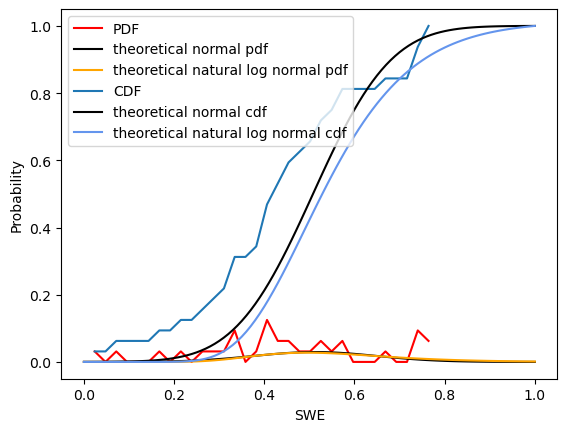

In [333]:
# plotting PDF and CDF 
plt.plot(bins_count1[1:], cdf_site1['pdf'], color="red", label="PDF") 
plt.plot(x_1,pdf_1,'k', label='theoretical normal pdf')
plt.plot(x_1,pdf_1_log,'orange',label='theoretical natural log normal pdf')

plt.plot(bins_count1[1:], cdf_site1['cdf'], label="CDF")
plt.plot(x_1,cdf_1,'k', label='theoretical normal cdf')
plt.plot(x_1, cdf_1_log,'cornflowerblue',label='theoretical natural log normal cdf')

plt.legend() 
plt.xlabel('SWE')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

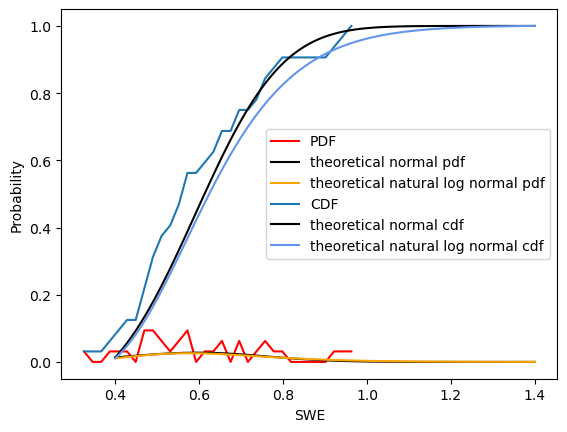

In [334]:
# plotting PDF and CDF 
plt.plot(bins_count2[1:], cdf_site2['pdf'], color="red", label="PDF") 
plt.plot(x_2,pdf_2,'k', label='theoretical normal pdf')
plt.plot(x_2,pdf_2_log,'orange',label='theoretical natural log normal pdf')

plt.plot(bins_count2[1:], cdf_site2['cdf'], label="CDF")
plt.plot(x_2,cdf_2,'k', label='theoretical normal cdf')
plt.plot(x_2, cdf_2_log,'cornflowerblue',label='theoretical natural log normal cdf')

plt.legend() 
plt.xlabel('SWE')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

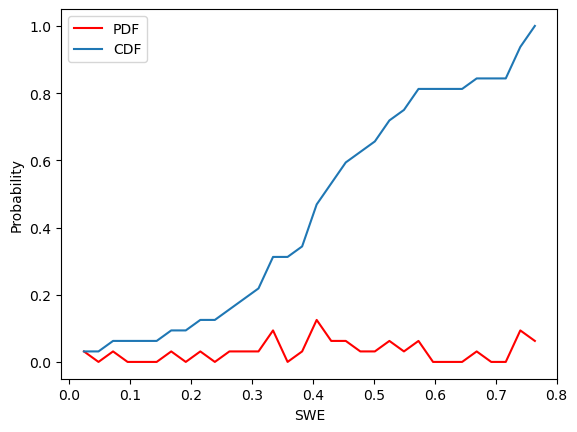

In [204]:
# plotting PDF and CDF 
plt.plot(bins_count1[1:], cdf_site1['pdf'], color="red", label="PDF") 
plt.plot(bins_count1[1:], cdf_site1['cdf'], label="CDF") 
plt.legend() 
plt.xlabel('SWE')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

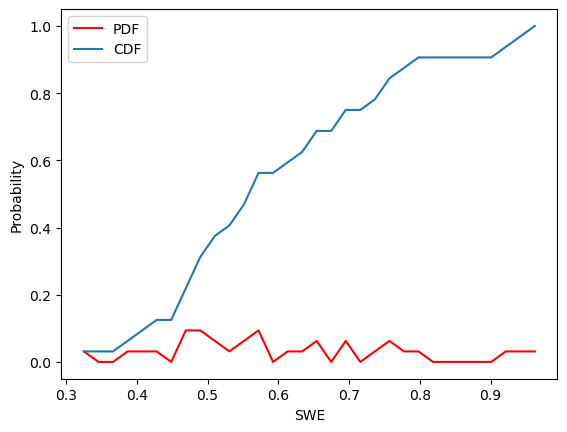

In [205]:
# plotting PDF and CDF 
plt.plot(bins_count2[1:], cdf_site2['pdf'], color="red", label="PDF") 
plt.plot(bins_count2[1:], cdf_site2['cdf'], label="CDF") 
plt.legend() 
plt.xlabel('SWE')
plt.ylabel('Probability')

In [206]:
cdf_site1[cdf_site1['reanalysis_swe'] == 0]['reanalysis_swe'] = 0.01
cdf_site1[cdf_site1['cdf'] == 0]['cdf'] = 0.01

/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [207]:
cdf_site1.loc[cdf_site1.index==2020, 'cdf']

year
2020    0.3125
Name: cdf, dtype: float64

In [208]:
f = interp1d(cdf_site1['cdf'], cdf_site1['reanalysis_swe'])
swe_quant = f(cdf_site1.loc[cdf_site1.index==2020, 'cdf'].values)

In [209]:
pred_quant = []
for year in np.arange(1990,2021):
    pred_quant.append(f(cdf_site1.loc[cdf_site1.index==year, 'cdf'].values)[0])

pred_quant.append(np.nan)

/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/scipy/interpolate/_interpolate.py:712: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/scipy/interpolate/_interpolate.py:715: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


In [222]:
site1_compare = df.loc[pd.IndexSlice[site1]][['station_swe']]

In [223]:
site1_compare['pred_quant'] = pred_quant

In [212]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(site1_compare).mark_circle().encode(
        x = alt.X('station_swe').title('Butte SNOTEL SWE (m)'), #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]),
        y = alt.Y('pred_quant').title('Butte SNOTEL SWE predicted with Schofield Pass Quantile Mapping (m)') #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]).scale(domain=[-5,5]).scale(domain=[0,2500]),
    ).properties(title='Predicted SWE')

combined = (station_predict + line2)

combined

alt.LayerChart(...)

In [224]:
site1_compare['difference'] = site1_compare['station_swe'] - site1_compare['pred_quant']
df_swe_pred_log['difference'].mean()

0.05328185442364653

In [225]:
site1_compare_na = site1_compare_na.replace([np.inf, -np.inf], np.nan, inplace=False)
site1_compare_na = site1_compare.dropna()
print('R value: ', np.corrcoef(site1_compare_na['station_swe'], site1_compare_na['pred_quant'])[0,1])

R value:  0.7013170757802358


## And with a third site:

### Plot Distributions of test sites:

In [244]:
site2 = '780_CO_SNTL'
site1 = '327_CO_SNTL'

In [245]:
swe_real = df.loc[pd.IndexSlice[site1],'station_swe']

In [246]:
df_reset = df.loc[pd.IndexSlice[site1]]
site1_unt= alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Untransformed SWE',width=200,height=200)

df_reset = df.loc[pd.IndexSlice[site1]]
site1_ln = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Natural Log of SWE',width=200,height=200)

combined = alt.hconcat(site1_unt, site1_ln)
combined

alt.HConcatChart(...)

In [247]:
df_reset = df.loc[pd.IndexSlice[site2]]
site2_unt= alt.Chart(df_reset[['station_swe']]).mark_bar().encode(
    alt.X("station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Untransformed SWE',width=200,height=200)

df_reset = df.loc[pd.IndexSlice[site2]]
site2_ln = alt.Chart(df_reset[['log_station_swe']].replace([np.inf, -np.inf], np.nan, inplace=False)).mark_bar().encode(
    alt.X("log_station_swe:Q").bin(maxbins=7),
    y='count()',
).properties(title='Natural Log of SWE',width=200,height=200)

combined = alt.hconcat(site2_unt, site2_ln)
combined

alt.HConcatChart(...)

### Predict SWE at Butte using untransformed data from Schofield Pass:

In [248]:
swe_pred = (df.loc[pd.IndexSlice[site2],'station_n'] * df.loc[pd.IndexSlice[site1],'reanalysis_swe'].std()) + df.loc[pd.IndexSlice[site1],'reanalysis_swe'].mean()

In [249]:
df_swe_pred = pd.DataFrame(swe_real)

In [250]:
df_swe_pred['swe_pred'] = swe_pred

In [251]:
df_swe_pred['difference'] = df_swe_pred['station_swe'] - df_swe_pred['swe_pred']

In [252]:
df_swe_pred['difference'].mean()

0.013424382820129343

In [253]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_swe_pred).mark_circle().encode(
        x = alt.X('station_swe').title('Butte SNOTEL SWE (m)'), #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]),
        y = alt.Y('swe_pred').title('Butte SNOTEL SWE predicted with Schofield Pass SNVs (m)') #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]).scale(domain=[-5,5]).scale(domain=[0,2500]),
    ).properties(title='Predicted SWE from Untransformed Values')

annotation = alt.Chart(df_swe_pred).mark_text(
    align='left',
    baseline='middle',
    fontSize = 20
).encode(
    text='A'
)

# text = base.mark_text(baseline="middle").encode(
#     text="num_cars:Q",
#     color=alt.condition(
#         alt.datum.num_cars > 100,
#         alt.value("black"),
#         alt.value("white"),
#     ),
# )

combined = (station_predict + line2 ) #+ annotation
#combined.save('../figures/swe_predicted.png')
combined

alt.LayerChart(...)

In [254]:
print('R value: ', np.corrcoef(df_swe_pred['station_swe'], df_swe_pred['swe_pred'])[0,1])

R value:  0.8565852797223394


### Predict SWE using log values:

In [256]:
site2 = '780_CO_SNTL'
site1 = '327_CO_SNTL'

In [257]:
swe_real = df.loc[pd.IndexSlice[site1],'station_swe']

In [258]:
df.loc[pd.IndexSlice[site1],'log_reanalysis_swe']

year
1990   -0.622875
1991   -0.399881
1992   -0.454760
1993   -0.410377
1994   -0.783510
1995   -0.305167
1996   -0.956592
1997   -0.434791
1998   -0.251800
1999   -0.877551
2000   -0.469684
2001   -0.602210
2002   -1.048109
2003   -0.455076
2004   -0.614336
2005   -0.690750
2006   -0.735220
2007   -0.801178
2008   -0.421899
2009   -0.995875
2010   -0.981897
2011   -0.758860
2012   -0.476424
2013   -1.439695
2014   -0.820981
2015   -1.066532
2016   -1.148854
2017   -0.633370
2018   -1.302689
2019   -0.302999
2020   -0.383606
2021   -0.543005
Name: log_reanalysis_swe, dtype: float32

In [259]:
swe_pred_log = (df.loc[pd.IndexSlice[site2],'log_station_n'] * df.loc[pd.IndexSlice[site1],'log_reanalysis_swe'].replace([np.inf, -np.inf], np.nan, inplace=False).std()) + df.loc[pd.IndexSlice[site1],'log_reanalysis_swe'].replace([np.inf, -np.inf], np.nan, inplace=False).mean()

In [260]:
df_swe_pred_log = pd.DataFrame(swe_real)

In [261]:
df_swe_pred_log['swe_pred_log'] = swe_pred_log

In [262]:
df_swe_pred_log['swe_pred_log_trans'] = math.e**df_swe_pred_log['swe_pred_log']

In [263]:
df_swe_pred_log['difference'] = df_swe_pred_log['station_swe'] - df_swe_pred_log['swe_pred_log_trans']

In [264]:
df_swe_pred_log['difference'].mean()

0.012508787427824682

In [265]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(df_swe_pred_log).mark_circle().encode(
        x = alt.X('station_swe').title('Butte SNOTEL SWE (m)'), #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]),
        y = alt.Y('swe_pred_log_trans').title('Butte SNOTEL SWE predicted with Schofield Pass Ln(SNVs) (m)') #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]).scale(domain=[-5,5]).scale(domain=[0,2500]),
    ).properties(title='Predicted SWE')

annotation = alt.Chart(df_swe_pred_log).mark_text(
    align='left',
    baseline='middle',
    fontSize = 20
).encode(
    text='A'
)

# text = base.mark_text(baseline="middle").encode(
#     text="num_cars:Q",
#     color=alt.condition(
#         alt.datum.num_cars > 100,
#         alt.value("black"),
#         alt.value("white"),
#     ),
# )

combined = (station_predict + line2) # + annotation
#combined.save('../figures/swe_predicted.png')
combined

alt.LayerChart(...)

In [266]:
print('R value: ', np.corrcoef(df_swe_pred_log['station_swe'], df_swe_pred_log['swe_pred_log_trans'])[0,1])

R value:  0.8608295420578269


### Predict SWE with Quantile Mapping:

In [267]:
site1

'327_CO_SNTL'

In [268]:
cdf_site1 = df.loc[pd.IndexSlice[site1]]
cdf_site2 = df.loc[pd.IndexSlice[site2]]

In [269]:
cdf_site2 = cdf_site2.sort_values('station_swe')
cdf_site1 = cdf_site1.sort_values('reanalysis_swe')

In [270]:
count2, bins_count2 = np.histogram(cdf_site2['station_swe'], bins=32)
count1, bins_count1 = np.histogram(cdf_site1['reanalysis_swe'], bins=32)

In [271]:
cdf_site1['pdf'] = count1 / sum(count1)
cdf_site2['pdf'] = count2 / sum(count2)

In [272]:
cdf_site2['cdf'] = np.cumsum(cdf_site2['pdf']) 
cdf_site1['cdf'] = np.cumsum(cdf_site1['pdf']) 

Text(0, 0.5, 'Probability')

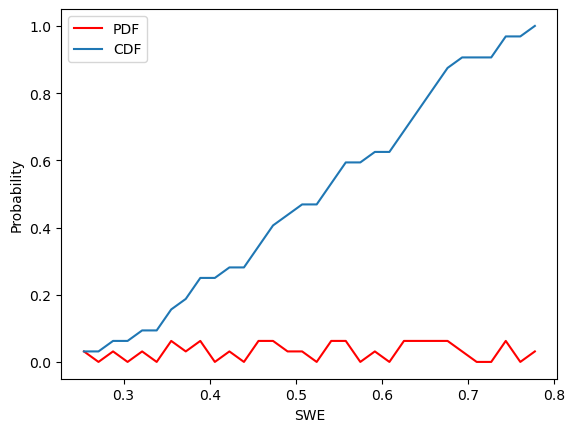

In [273]:
# plotting PDF and CDF 
plt.plot(bins_count1[1:], cdf_site1['pdf'], color="red", label="PDF") 
plt.plot(bins_count1[1:], cdf_site1['cdf'], label="CDF") 
plt.legend() 
plt.xlabel('SWE')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

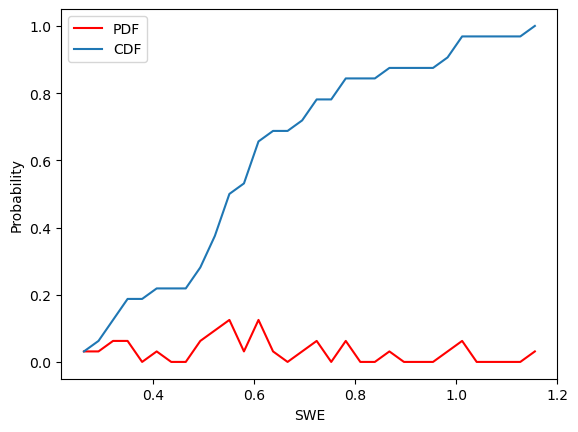

In [274]:
# plotting PDF and CDF 
plt.plot(bins_count2[1:], cdf_site2['pdf'], color="red", label="PDF") 
plt.plot(bins_count2[1:], cdf_site2['cdf'], label="CDF") 
plt.legend() 
plt.xlabel('SWE')
plt.ylabel('Probability')

In [275]:
cdf_site1[cdf_site1['reanalysis_swe'] == 0]['reanalysis_swe'] = 0.01
cdf_site1[cdf_site1['cdf'] == 0]['cdf'] = 0.01

In [276]:
cdf_site1.loc[cdf_site1.index==2020, 'cdf']

year
2020    0.90625
Name: cdf, dtype: float64

In [277]:
f = interp1d(cdf_site1['cdf'], cdf_site1['reanalysis_swe'])
swe_quant = f(cdf_site1.loc[cdf_site1.index==2020, 'cdf'].values)

In [278]:
pred_quant = []
for year in np.arange(1990,2021):
    pred_quant.append(f(cdf_site1.loc[cdf_site1.index==year, 'cdf'].values)[0])

pred_quant.append(np.nan)

/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/scipy/interpolate/_interpolate.py:712: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/scipy/interpolate/_interpolate.py:715: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


In [279]:
site1_compare = df.loc[pd.IndexSlice[site1]][['station_swe']]

In [280]:
site1_compare['pred_quant'] = pred_quant

In [281]:
data2 = {'x': np.linspace(0,1,100),
        'y': np.linspace(0,1,100)}
df_lin2 = pd.DataFrame(data2)
    
line2 = alt.Chart(df_lin2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    color=alt.value("#808080")
)

station_predict = alt.Chart(site1_compare).mark_circle().encode(
        x = alt.X('station_swe').title('Butte SNOTEL SWE (m)'), #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]),
        y = alt.Y('pred_quant').title('Butte SNOTEL SWE predicted with Schofield Pass Quantile Mapping (m)') #.axis(values=[-5,-4,-3,-2,-1,0,1,2,3,4,5]).scale(domain=[-5,5]).scale(domain=[0,2500]),
    ).properties(title='Predicted SWE')

combined = (station_predict + line2)

combined

alt.LayerChart(...)

In [282]:
site1_compare['difference'] = site1_compare['station_swe'] - site1_compare['pred_quant']
df_swe_pred_log['difference'].mean()

0.012508787427824682

In [283]:
site1_compare_na = site1_compare_na.replace([np.inf, -np.inf], np.nan, inplace=False)
site1_compare_na = site1_compare.dropna()
print('R value: ', np.corrcoef(site1_compare_na['station_swe'], site1_compare_na['pred_quant'])[0,1])

R value:  0.46493368347948555


## Test Normalcy of Stations:

#### Untransformed Values:

In [398]:
normal_stats = []
normal_pvalue = []

for site in df.index.get_level_values(0).unique():
    shapiro = stats.shapiro(df.loc[pd.IndexSlice[site],'station_swe'])
    normal_stats.append(shapiro)
    normal_pvalue.append(shapiro[1])
    

In [394]:
#normal_pvalue

norm = [x for x in normal_pvalue if x > 0.05]
not_norm = [x for x in normal_pvalue if x <= 0.05]

In [396]:
len(norm) / (len(normal_pvalue))

0.8337078651685393

#### Natural Log Values:

In [399]:
normal_stats_log = []
normal_pvalue_log = []

for site in df.index.get_level_values(0).unique():
    shapiro = stats.shapiro(df.loc[pd.IndexSlice[site],'log_station_swe'])
    normal_stats_log.append(shapiro)
    normal_pvalue_log.append(shapiro[1])

In [400]:
norm_log = [x for x in normal_pvalue_log if x > 0.05]
not_norm_log = [x for x in normal_pvalue_log if x <= 0.05]

In [401]:
len(norm_log) / (len(normal_pvalue_log))

0.7730337078651686

## Test Spatial Patterns within a cluster:

In [402]:
df.columns

Index(['station_n', 'reanalysis_n', 'elevation_m', 'station_swe',
       'station_swe_mean', 'reanalysis_swe', 'deg_days_0C', 'cold_deg_days',
       'cumulative_precip_m', 'precip_mean', 'precip_std', 'precip_n',
       'log_cumulative_precip_m', 'log_reanalysis_swe', 'log_station_swe',
       'log_precip_mean', 'log_station_swe_mean', 'log_reanalysis_swe_mean',
       'log_precip_std', 'log_station_swe_std', 'log_reanalysis_swe_std',
       'log_precip_n', 'log_station_n', 'log_reanalysis_n', 'latitude',
       'longitude', 'geometry', 'cluster'],
      dtype='object')

In [4]:
ucrb = gpd.read_file('../data/huc2.geojson')

In [5]:
ucrb['huc2'] = ucrb['huc2'].astype('int')

In [409]:
ucrb

,huc2,areaacres,areasqkm,states,huc10,name,geometry
0,9,7.368587e+05,2981.97,"MTMTCN,MTCN,MTCN,MTCN,MTCN,MTMTCN,MT",0904000101090400010209040002010904000103090400...,Headwaters Saint Mary RiverSwiftcurrent CreekH...,"POLYGON ((-113.46394 48.61630, -113.46407 48.6..."
1,10,1.521878e+08,615882.85,MTCOCOCOCOCOCOMTMTMTCOMTMTMTMTMTMTMTMTMTMTMTMT...,1004020102101900030910190003101019000311101900...,South Fork Musselshell RiverLost CreekSanborn ...,"POLYGON ((-111.87005 44.56395, -111.87022 44.5..."
2,11,3.276798e+07,132607.43,"NM,TXNM,TXNM,TXCO,NMCO,NMNM,OKNM,TXCO,NM,OKCO,...",1112010103110901010311120101021104000103110800...,Frio DrawArroyo TrujilloOutlet Tierra Blanca C...,"POLYGON ((-104.67753 35.22997, -104.67807 35.2..."
3,12,5.459801e+06,22095.06,"NM,TXNM,TXNM,TXNM,TXNM,TXNM,TXNM,TXNM,TXNM,TXN...",1205000202120500050112080001021208000307120800...,Headwaters Blackwater DrawRunning Water DrawSu...,"POLYGON ((-103.06480 32.69076, -103.06486 32.6..."
4,13,5.691493e+07,230326.85,"MX,NMNM,TXNM,TXNM,TXNM,TXNM,TXMX,NMMX,NMMX,NMM...",1303020109130500040913050004171307000101130700...,Simpson DrawNorth DrawLinda LakeRed Bluff Rese...,"POLYGON ((-108.75655 31.33269, -108.75660 31.3..."
5,14,7.254242e+07,293569.06,"COCOCOWYAZ,NMAZ,NMCO,NMCO,NMCO,NMCO,NMCO,NMCO,...",1401000107140100011014010003021404010108140801...,Muddy CreekRock CreekUpper Eagle RiverMuddy Cr...,"POLYGON ((-110.93089 36.58755, -110.93103 36.5..."
6,15,9.350180e+07,378388.72,"AZAZ,MXAZ,MXAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZNVNV...",1505030203150801030615050301051506010503150601...,Tanque Verde Creek-Rillito RiverTule DesertJos...,"POLYGON ((-114.80074 32.49040, -114.81362 32.4..."
7,16,9.069970e+07,367048.98,"NVNVNVNVNVNVNVNVNVNVCA,NVNVNVNV,UTNV,UTNV,UTNV...",1604010705160401070116040107021604010704160401...,Antelope CreekHeadwaters Reese RiverCottonwood...,"POLYGON ((-119.08154 38.21990, -119.08087 38.2..."
8,17,1.822409e+08,737503.26,"ORORIDWAORORORORORORORORID,ORIDIDIDIDWAWAWAIDI...",1705010807170703060217040214041706010904170701...,Lower Cow CreekWillow CreekLower Beaver CreekL...,"MULTIPOLYGON (((-124.42555 42.35187, -124.4240..."
9,18,1.072632e+08,434079.25,"CACACA,MXCA,MXCACACACACACACACACACACACACACACACA...",1806000901180902080518070305051807030513180400...,San Antonio CreekUpper Fremont WashArroyo Seco...,"MULTIPOLYGON (((-123.01153 38.00344, -122.9924..."


In [6]:
ucrb = ucrb[ucrb['huc2']==14]

In [411]:
ucrb

,huc2,areaacres,areasqkm,states,huc10,name,geometry
5,14,72542420.79,293569.06,"COCOCOWYAZ,NMAZ,NMCO,NMCO,NMCO,NMCO,NMCO,NMCO,...",1401000107140100011014010003021404010108140801...,Muddy CreekRock CreekUpper Eagle RiverMuddy Cr...,"POLYGON ((-110.93089 36.58755, -110.93103 36.5..."


In [7]:
ucrb = ucrb.to_crs('epsg:4326')

In [8]:
df_ucrb = df.clip(ucrb)

<Axes: >

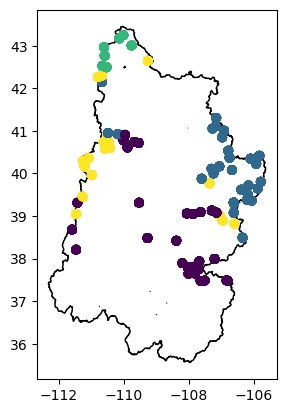

In [416]:
fig, ax = plt.subplots()

ucrb.plot(ax=ax, facecolor='none', edgecolor='k')
df_ucrb.plot(ax=ax, column='cluster')

<Axes: >

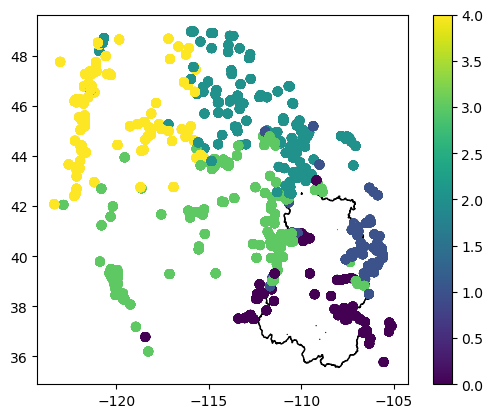

In [418]:
fig, ax = plt.subplots()

ucrb.plot(ax=ax, facecolor='none', edgecolor='k')
df.plot(ax=ax, column='cluster', legend=True)

<Axes: >

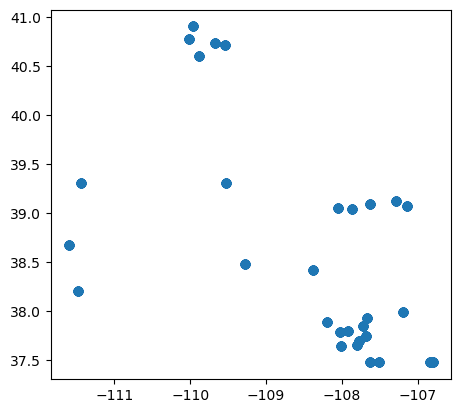

In [420]:
df_ucrb[df_ucrb['cluster']==0].plot()

In [436]:
len(df_ucrb[df_ucrb['cluster']==0]) / 32

30.0

In [427]:
df_ucrb

station_n  reanalysis_n  elevation_m  station_swe  \
station     year                                                      
874_CO_SNTL 1990  -1.158316     -1.363052  3352.800049      0.48260   
            1991   0.836619     -0.920469  3352.800049      0.94234   
            2021   0.241445     -0.812500  3352.800049      0.80518   
            2020  -0.166359     -0.344040  3352.800049      0.71120   
            2019   1.861640      0.944449  3352.800049      1.17856   
...                     ...           ...          ...          ...   
555_WY_SNTL 1995  -0.274240     -0.375197  2359.152100      0.28702   
            1994  -0.554315     -0.556152  2359.152100      0.25654   
            1993  -0.227561      0.618156  2359.152100      0.29210   
            1992  -1.487899     -1.163552  2359.152100      0.15494   
            1991  -0.390938     -0.458715  2359.152100      0.27432   

                  station_swe_mean  reanalysis_swe  deg_days_0C  \
station     year                                                  
874_CO_SNTL 1990          0.749538          0.3130         12.0   
            1991          0.749538          0.4122          2.0   
            2021          0.749538          0.4364          6.0   
            2020          0.749538          0.5414         10.0   
            2019          0.749538          0.8302          2.0   
...                            ...             ...          ...   
555_WY_SNTL 1995          0.316865          0.2436          2.0   
            1994          0.316865          0.2150          2.0   
            1993          0.316865          0.4006          5.0   
            1992          0.316865          0.1190          0.0   
            1991          0.316865          0.2304          0.0   

                  cold_deg_days  cumulative_precip_m  precip_mean  ...  \
station     year                                                   ...   
874_CO_SNTL 1990            0.0             0.250970     0.286080  ...   
            1991            0.0             0.358043     0.286080  ...   
            2021            0.0             0.255747     0.286080  ...   
            2020            0.0             0.299887     0.286080  ...   
            2019            0.0             0.423093     0.286080  ...   
...                         ...                  ...          ...  ...   
555_WY_SNTL 1995            0.0             0.326875     0.305987  ...   
            1994            0.0             0.240545     0.305987  ...   
            1993            0.0             0.334753     0.305987  ...   
            1992            1.0             0.191015     0.305987  ...   
            1991            1.0             0.240227     0.305987  ...   

                  log_precip_std  log_station_swe_std  log_reanalysis_swe_std  \
station     year                                                                
874_CO_SNTL 1990        0.314287             0.339562                0.373401   
            1991        0.314287             0.339562                0.373401   
            2021        0.314287             0.339562                0.373401   
            2020        0.314287             0.339562                0.373401   
            2019        0.314287             0.339562                0.373401   
...                          ...                  ...                     ...   
555_WY_SNTL 1995        0.270338             0.336051                0.518697   
            1994        0.270338             0.336051                0.518697   
            1993        0.270338             0.336051                0.518697   
            1992        0.270338             0.336051                0.518697   
            1991        0.270338             0.336051                0.518697   

                  log_precip_n  log_station_n  log_reanalysis_n   latitude  \
station     year                                                             
874_CO_SNTL 1990     -0.264459      -1.143926    

In [434]:
len(df_ucrb[(df_ucrb.index.get_level_values(1)==1990) & (df_ucrb['cluster']==0)]['station_n'].values)

30

In [437]:
pearsons_cc = np.corrcoef(df_ucrb[(df_ucrb.index.get_level_values(1)==1990) & (df_ucrb['cluster']==0)]['station_n'].values)

In [438]:
pearsons_cc

1.0

In [36]:
reshaped_df = df[df['cluster']==0]['station_n'].unstack(level=0)

In [37]:
reshaped_df

station,316_NM_SNTL,327_CO_SNTL,339_UT_SNTL,348_UT_SNTL,364_UT_SNTL,386_CO_SNTL,390_UT_SNTL,394_NM_SNTL,396_UT_SNTL,409_CO_SNTL,...,833_UT_SNTL,839_CO_SNTL,840_CO_SNTL,843_CO_SNTL,853_UT_SNTL,854_NM_SNTL,857_CO_SNTL,865_UT_SNTL,874_CO_SNTL,CRL
year,,,,,,,,,,,,,,,,,,,,,
1990,-0.447354,-0.828297,-1.207037,-0.752704,-0.601298,-0.965994,-0.931263,-0.645069,0.642324,-1.085041,...,0.959892,-0.511655,-1.129775,-0.962830,-0.331880,-0.029684,-0.489221,-0.856166,-1.158316,-0.745457
1991,1.356706,0.481861,-0.145419,-0.691102,-0.262240,1.095867,-0.287376,1.349249,0.111254,1.016289,...,0.125828,0.021280,0.405971,-0.222465,0.469233,0.801474,0.697894,-0.435747,0.836619,-0.279140
1992,1.637859,-0.641132,-0.092339,-0.537096,-0.177476,0.193803,0.439061,1.164209,-0.459154,0.508585,...,-0.564431,0.820683,0.473582,1.286740,0.057851,1.513895,0.401115,1.158343,-0.188403,-0.494363
1993,1.591000,0.971371,1.517781,2.881837,1.687342,2.078473,2.403742,1.966048,0.917693,2.497092,...,0.873609,0.761468,1.719565,2.383049,1.789989,2.022767,2.206519,2.437118,1.332597,0.950170
1994,0.841260,-0.540350,-1.030100,-0.875909,-0.347004,0.000503,-0.518515,0.239010,-0.675515,-0.492720,...,-0.075497,-0.422832,-0.241168,-0.478745,-0.537572,0.886286,1.118331,-0.523334,-0.287598,-0.360596
1995,1.637859,1.388894,0.898504,1.002964,1.115182,0.709268,1.396637,0.629649,1.468432,0.875260,...,1.362543,-0.156365,1.526389,1.229789,1.259521,1.089835,0.722625,1.473657,1.442814,1.701956
1996,-0.236490,-0.425172,-0.269275,0.171332,0.670169,0.338778,-0.287376,-0.994589,-0.282131,-0.577337,...,-0.535670,-1.311058,-0.936600,-0.564172,-0.526746,-0.572481,-0.142979,-0.943754,-1.026055,0.707298
1997,0.208668,2.195145,0.739262,0.325338,0.267538,0.209911,-0.138787,0.280130,0.484970,0.353454,...,0.154589,0.554216,1.284920,1.258264,-0.927303,1.055910,0.500041,0.212399,0.726401,1.066002
1998,-0.002197,-0.166019,1.075440,-0.598698,1.072800,0.145478,0.455571,0.053970,0.445631,0.085499,...,0.729805,0.346963,-0.086627,0.133479,0.534189,0.852361,-0.068785,0.405091,0.285532,1.657865


In [40]:
cluster0_corr = np.corrcoef(reshaped_df)

In [41]:
cluster0_corr

array([[ 1.        , -0.12655147, -0.0399228 , ..., -0.38549574,
         0.26354375, -0.0150172 ],
       [-0.12655147,  1.        ,  0.25052637, ...,  0.20131831,
        -0.15939572,  0.22684585],
       [-0.0399228 ,  0.25052637,  1.        , ..., -0.02473567,
         0.19660095,  0.27402422],
       ...,
       [-0.38549574,  0.20131831, -0.02473567, ...,  1.        ,
         0.14999194,  0.27197349],
       [ 0.26354375, -0.15939572,  0.19660095, ...,  0.14999194,
         1.        ,  0.47224259],
       [-0.0150172 ,  0.22684585,  0.27402422, ...,  0.27197349,
         0.47224259,  1.        ]])

In [9]:
import statistics

In [440]:
statistics.variance(df_ucrb[(df_ucrb.index.get_level_values(1)==1990) & (df_ucrb['cluster']==0)]['station_n'].values)

0.37893747088494323

In [43]:
df_ucrb['dif_from_mean'] = np.nan

/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [44]:
df_ucrb_0 = df_ucrb[df_ucrb['cluster']==0]
df_ucrb_1 = df_ucrb[df_ucrb['cluster']==1]
df_ucrb_2 = df_ucrb[df_ucrb['cluster']==2]
df_ucrb_3 = df_ucrb[df_ucrb['cluster']==3]

In [45]:
for site, year in zip(df_ucrb_0.index.get_level_values(0), df_ucrb_0.index.get_level_values(1)):
    df_ucrb_0.loc[pd.IndexSlice[site,year],'dif_from_mean'] = df_ucrb_0.loc[pd.IndexSlice[site,year],'station_n'] - df_ucrb_0.loc[pd.IndexSlice[:,year],'station_n'].mean()

for site, year in zip(df_ucrb_1.index.get_level_values(0), df_ucrb_1.index.get_level_values(1)):
    df_ucrb_1.loc[pd.IndexSlice[site,year],'dif_from_mean'] = df_ucrb_1.loc[pd.IndexSlice[site,year],'station_n'] - df_ucrb_1.loc[pd.IndexSlice[:,year],'station_n'].mean()

for site, year in zip(df_ucrb_2.index.get_level_values(0), df_ucrb_2.index.get_level_values(1)):
    df_ucrb_2.loc[pd.IndexSlice[site,year],'dif_from_mean'] = df_ucrb_2.loc[pd.IndexSlice[site,year],'station_n'] - df_ucrb_2.loc[pd.IndexSlice[:,year],'station_n'].mean()

for site, year in zip(df_ucrb_3.index.get_level_values(0), df_ucrb_3.index.get_level_values(1)):
    df_ucrb_3.loc[pd.IndexSlice[site,year],'dif_from_mean'] = df_ucrb_3.loc[pd.IndexSlice[site,year],'station_n'] - df_ucrb_3.loc[pd.IndexSlice[:,year],'station_n'].mean()

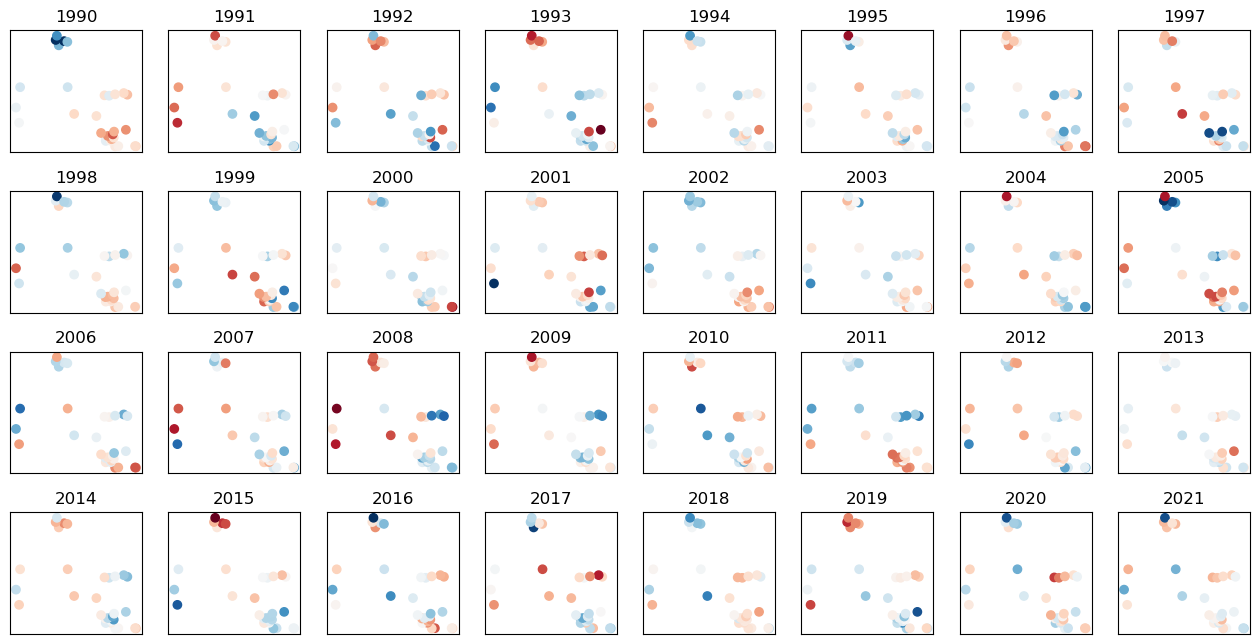

In [477]:
fig, axes = plt.subplots(4,8, figsize=(16,8))

for ax, year in zip(axes.ravel(), np.arange(1990,2022)):
    df_ucrb_0[df_ucrb_0.index.get_level_values(1)==year].plot(ax=ax, column='dif_from_mean', cmap='RdBu', legend=False, vmin=-1.5, vmax=1.5)
    #ucrb.plot(ax=ax, facecolor='none', edgecolor='k')
    ax.set_title(f'{year}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

<Axes: >

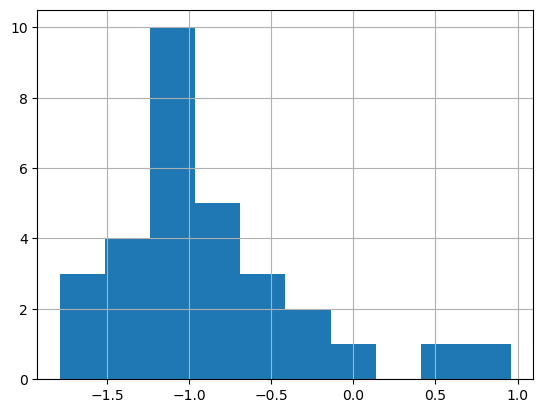

In [479]:
df_ucrb_0[df_ucrb_0.index.get_level_values(1)==1990]['station_n'].hist()

In [480]:
normal_stats_yr = []
normal_pvalue_yr = []

for year in df_ucrb_0.index.get_level_values(1).unique():
    shapiro = stats.shapiro(df_ucrb_0.loc[pd.IndexSlice[:, year],'station_n'])
    normal_stats_yr.append(shapiro)
    normal_pvalue_yr.append(shapiro[1])

In [481]:
norm = [x for x in normal_pvalue_yr if x > 0.05]
not_norm = [x for x in normal_pvalue_yr if x <= 0.05]

In [482]:
len(norm) / len(normal_pvalue_yr)

0.875

In [483]:
len(normal_pvalue_yr)

32

In [484]:
df_ucrb_0[df_ucrb_0.index.get_level_values(1)==year]['station_n'].values

array([-2.15027191, -1.86247239, -1.70319483, -1.9219935 , -1.38480969,
       -1.61973757, -1.7671921 , -1.77691359, -1.35403365, -1.78777241,
       -1.66412705, -1.39098902, -2.03907344, -1.00042333, -1.9278171 ,
       -1.16207423, -1.21950783, -1.41802719, -0.89401333, -1.36784616,
       -1.13375822, -0.95688216, -0.6686716 , -1.38991191, -0.6603007 ,
       -0.71767138, -0.90226084, -0.79451695, -0.61650767, -0.77190638])

In [52]:
from scipy.linalg import svd

In [491]:
df_ucrb_0['station_n']

station      year
874_CO_SNTL  1990   -1.158316
             1991    0.836619
             2021    0.241445
             2020   -0.166359
             2019    1.861640
                       ...   
833_UT_SNTL  1992   -0.564431
             1994   -0.075497
             1995    1.362543
             1996   -0.535670
             1991    0.125828
Name: station_n, Length: 960, dtype: float64

In [494]:
new_df = df_ucrb_0['station_n'].unstack(level=1)

In [505]:
U, S, V = svd(new_df.values,full_matrices=False)

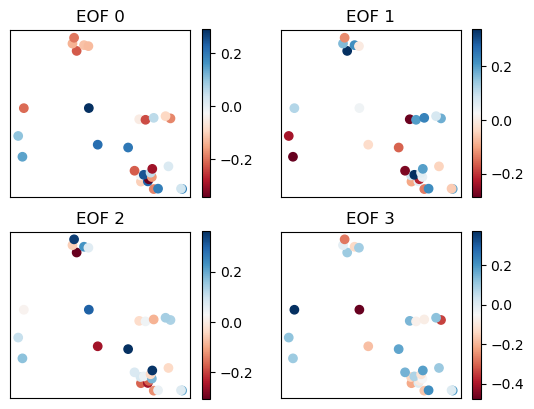

In [513]:
fig, axes = plt.subplots(2,2)

for ax, i in zip(axes.ravel(), np.arange(0,4)):
    df_ucrb_0[df_ucrb_0.index.get_level_values(1)==1990].plot(ax=ax, column=U[i], cmap='RdBu',legend=True)
    ax.set_title(f'EOF {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [517]:
new_df = df_ucrb_0['dif_from_mean'].unstack(level=1)

In [518]:
U, S, V = svd(new_df.values,full_matrices=False)

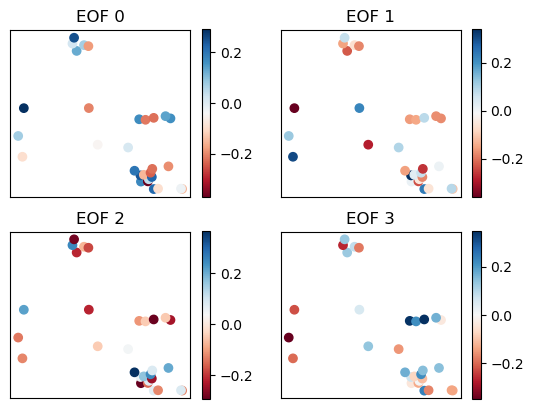

In [516]:
fig, axes = plt.subplots(2,2)

for ax, i in zip(axes.ravel(), np.arange(0,4)):
    df_ucrb_0[df_ucrb_0.index.get_level_values(1)==1990].plot(ax=ax, column=U[i], cmap='RdBu',legend=True)
    ax.set_title(f'EOF {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [519]:
var_exp = S / np.sum(S)

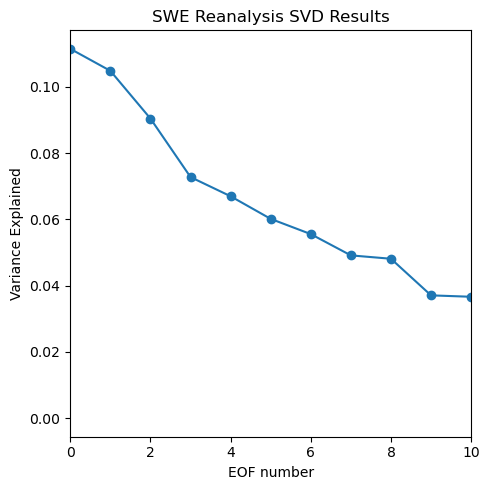

In [520]:
plt.figure(figsize=(5,5))
plt.plot(var_exp,'-o')
plt.xlabel('EOF number')
plt.ylabel('Variance Explained')
#plt.title('SVD Variance Explained')
#plt.ylim([0,0.16])
plt.xlim([0,10])
plt.title('SWE Reanalysis SVD Results')
plt.tight_layout()

### Cluster 1

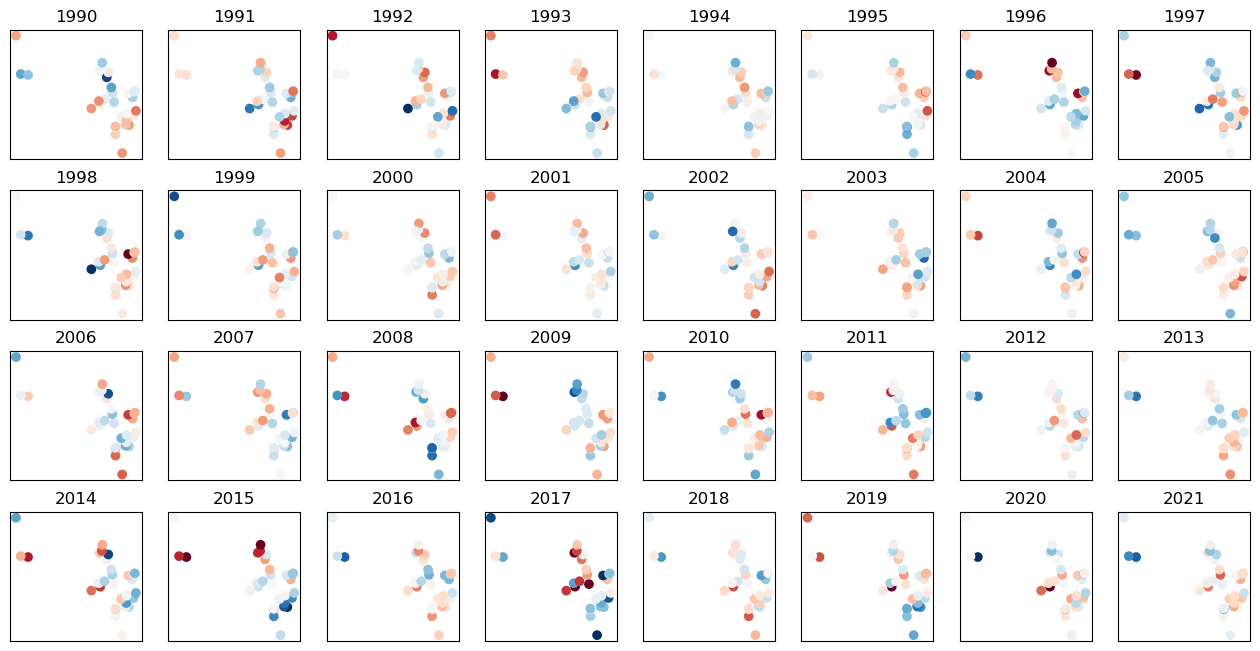

In [46]:
fig, axes = plt.subplots(4,8, figsize=(16,8))

for ax, year in zip(axes.ravel(), np.arange(1990,2022)):
    df_ucrb_1[df_ucrb_1.index.get_level_values(1)==year].plot(ax=ax, column='dif_from_mean', cmap='RdBu', legend=False, vmin=-1.5, vmax=1.5)
    #ucrb.plot(ax=ax, facecolor='none', edgecolor='k')
    ax.set_title(f'{year}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [47]:
normal_stats_yr = []
normal_pvalue_yr = []

for year in df_ucrb_1.index.get_level_values(1).unique():
    shapiro = stats.shapiro(df_ucrb_1.loc[pd.IndexSlice[:, year],'station_n'])
    normal_stats_yr.append(shapiro)
    normal_pvalue_yr.append(shapiro[1])

In [48]:
norm = [x for x in normal_pvalue_yr if x > 0.05]
not_norm = [x for x in normal_pvalue_yr if x <= 0.05]

In [49]:
len(norm) / len(normal_pvalue_yr)

0.96875

In [50]:
new_df = df_ucrb_1['station_n'].unstack(level=1)

In [53]:
U, S, V = svd(new_df.values,full_matrices=False)

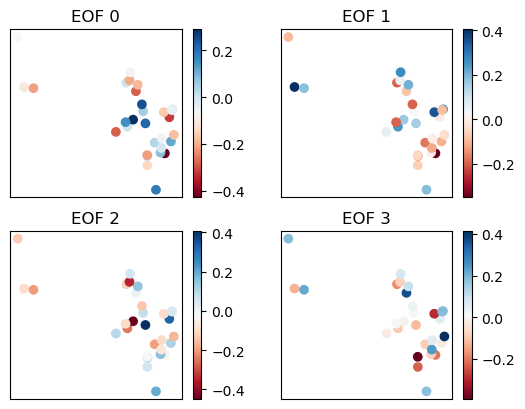

In [54]:
fig, axes = plt.subplots(2,2)

for ax, i in zip(axes.ravel(), np.arange(0,4)):
    df_ucrb_1[df_ucrb_1.index.get_level_values(1)==1990].plot(ax=ax, column=U[i], cmap='RdBu',legend=True)
    ax.set_title(f'EOF {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [55]:
new_df = df_ucrb_1['dif_from_mean'].unstack(level=1)

In [56]:
U, S, V = svd(new_df.values,full_matrices=False)

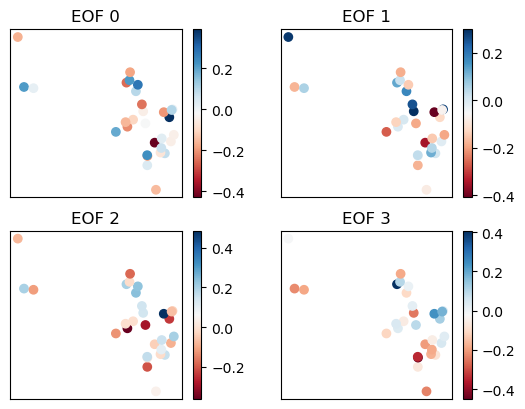

In [57]:
fig, axes = plt.subplots(2,2)

for ax, i in zip(axes.ravel(), np.arange(0,4)):
    df_ucrb_1[df_ucrb_1.index.get_level_values(1)==1990].plot(ax=ax, column=U[i], cmap='RdBu',legend=True)
    ax.set_title(f'EOF {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [58]:
var_exp = S / np.sum(S)

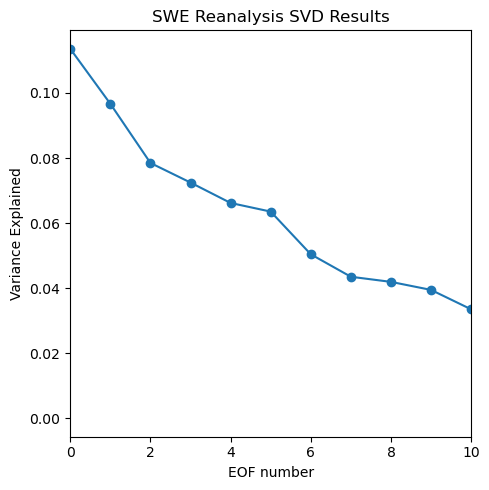

In [59]:
plt.figure(figsize=(5,5))
plt.plot(var_exp,'-o')
plt.xlabel('EOF number')
plt.ylabel('Variance Explained')
#plt.title('SVD Variance Explained')
#plt.ylim([0,0.16])
plt.xlim([0,10])
plt.title('SWE Reanalysis SVD Results')
plt.tight_layout()

## Cluster 2

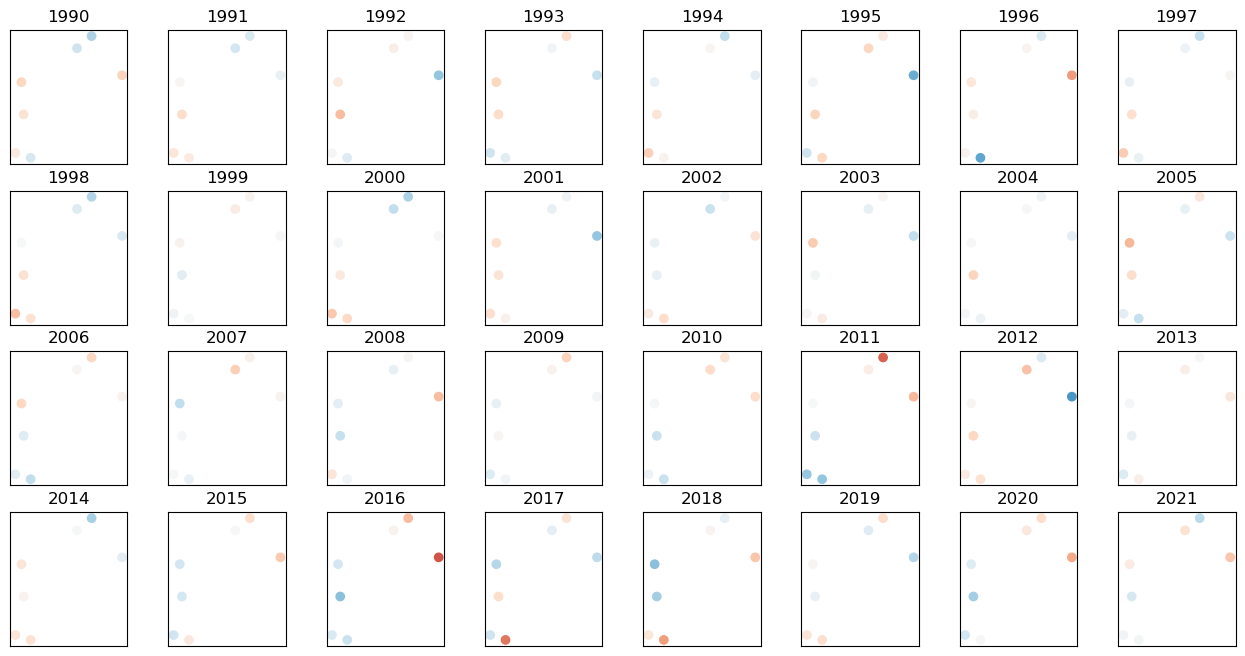

In [60]:
fig, axes = plt.subplots(4,8, figsize=(16,8))

for ax, year in zip(axes.ravel(), np.arange(1990,2022)):
    df_ucrb_2[df_ucrb_2.index.get_level_values(1)==year].plot(ax=ax, column='dif_from_mean', cmap='RdBu', legend=False, vmin=-1.5, vmax=1.5)
    #ucrb.plot(ax=ax, facecolor='none', edgecolor='k')
    ax.set_title(f'{year}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [62]:
normal_stats_yr = []
normal_pvalue_yr = []

for year in df_ucrb_2.index.get_level_values(1).unique():
    shapiro = stats.shapiro(df_ucrb_2.loc[pd.IndexSlice[:, year],'station_n'])
    normal_stats_yr.append(shapiro)
    normal_pvalue_yr.append(shapiro[1])

In [63]:
norm = [x for x in normal_pvalue_yr if x > 0.05]
not_norm = [x for x in normal_pvalue_yr if x <= 0.05]

In [64]:
len(norm) / len(normal_pvalue_yr)

0.96875

In [65]:
new_df = df_ucrb_2['station_n'].unstack(level=1)

In [66]:
U, S, V = svd(new_df.values,full_matrices=False)

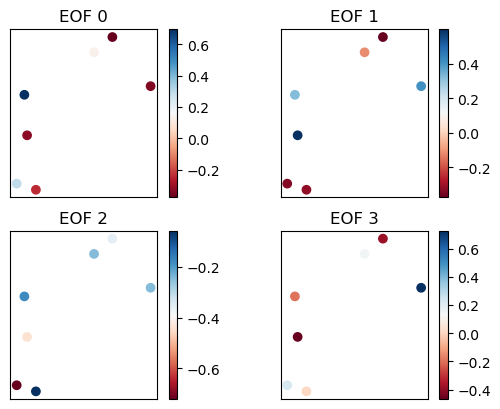

In [67]:
fig, axes = plt.subplots(2,2)

for ax, i in zip(axes.ravel(), np.arange(0,4)):
    df_ucrb_2[df_ucrb_2.index.get_level_values(1)==1990].plot(ax=ax, column=U[i], cmap='RdBu',legend=True)
    ax.set_title(f'EOF {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [68]:
new_df = df_ucrb_2['dif_from_mean'].unstack(level=1)

In [69]:
U, S, V = svd(new_df.values,full_matrices=False)

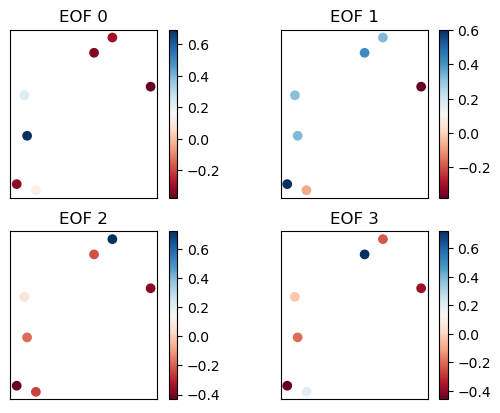

In [70]:
fig, axes = plt.subplots(2,2)

for ax, i in zip(axes.ravel(), np.arange(0,4)):
    df_ucrb_2[df_ucrb_2.index.get_level_values(1)==1990].plot(ax=ax, column=U[i], cmap='RdBu',legend=True)
    ax.set_title(f'EOF {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [71]:
var_exp = S / np.sum(S)

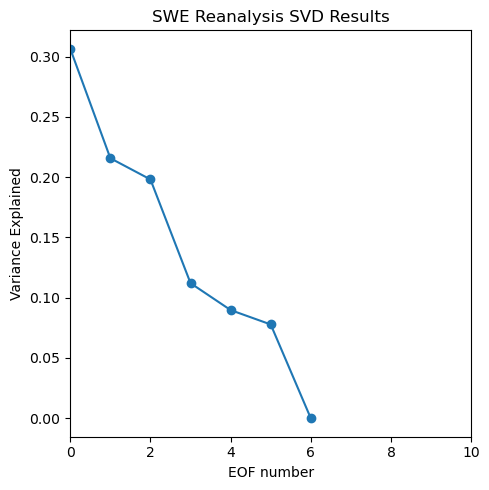

In [72]:
plt.figure(figsize=(5,5))
plt.plot(var_exp,'-o')
plt.xlabel('EOF number')
plt.ylabel('Variance Explained')
#plt.title('SVD Variance Explained')
#plt.ylim([0,0.16])
plt.xlim([0,10])
plt.title('SWE Reanalysis SVD Results')
plt.tight_layout()

## Cluster 3

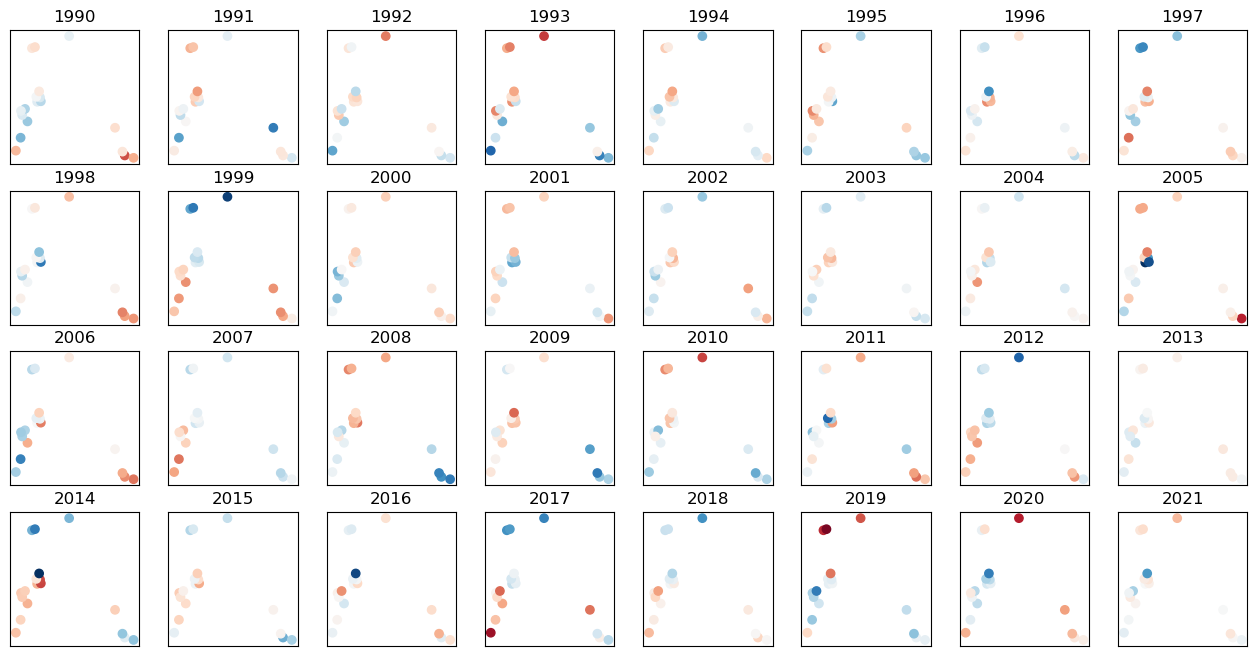

In [73]:
fig, axes = plt.subplots(4,8, figsize=(16,8))

for ax, year in zip(axes.ravel(), np.arange(1990,2022)):
    df_ucrb_3[df_ucrb_3.index.get_level_values(1)==year].plot(ax=ax, column='dif_from_mean', cmap='RdBu', legend=False, vmin=-1.5, vmax=1.5)
    #ucrb.plot(ax=ax, facecolor='none', edgecolor='k')
    ax.set_title(f'{year}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [74]:
normal_stats_yr = []
normal_pvalue_yr = []

for year in df_ucrb_3.index.get_level_values(1).unique():
    shapiro = stats.shapiro(df_ucrb_3.loc[pd.IndexSlice[:, year],'station_n'])
    normal_stats_yr.append(shapiro)
    normal_pvalue_yr.append(shapiro[1])

In [75]:
norm = [x for x in normal_pvalue_yr if x > 0.05]
not_norm = [x for x in normal_pvalue_yr if x <= 0.05]

In [76]:
len(norm) / len(normal_pvalue_yr)

0.90625

In [77]:
new_df = df_ucrb_3['station_n'].unstack(level=1)

In [78]:
U, S, V = svd(new_df.values,full_matrices=False)

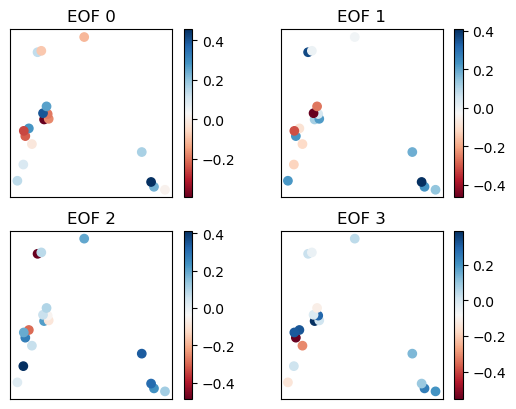

In [79]:
fig, axes = plt.subplots(2,2)

for ax, i in zip(axes.ravel(), np.arange(0,4)):
    df_ucrb_3[df_ucrb_3.index.get_level_values(1)==1990].plot(ax=ax, column=U[i], cmap='RdBu',legend=True)
    ax.set_title(f'EOF {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [80]:
new_df = df_ucrb_3['dif_from_mean'].unstack(level=1)

In [81]:
U, S, V = svd(new_df.values,full_matrices=False)

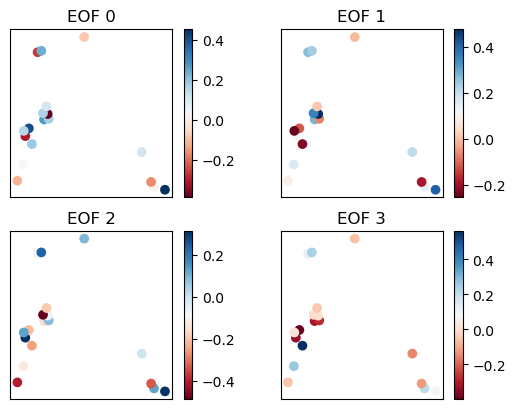

In [82]:
fig, axes = plt.subplots(2,2)

for ax, i in zip(axes.ravel(), np.arange(0,4)):
    df_ucrb_3[df_ucrb_3.index.get_level_values(1)==1990].plot(ax=ax, column=U[i], cmap='RdBu',legend=True)
    ax.set_title(f'EOF {i}')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

In [83]:
var_exp = S / np.sum(S)

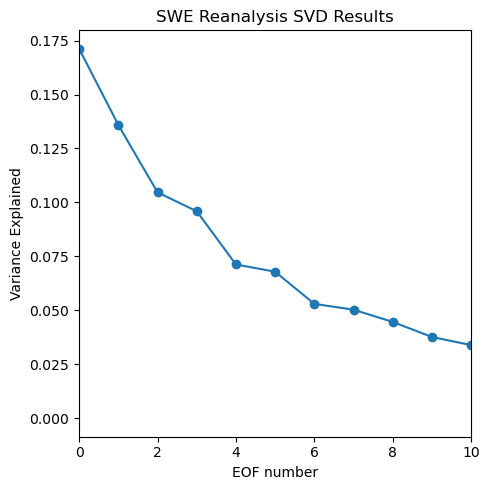

In [84]:
plt.figure(figsize=(5,5))
plt.plot(var_exp,'-o')
plt.xlabel('EOF number')
plt.ylabel('Variance Explained')
#plt.title('SVD Variance Explained')
#plt.ylim([0,0.16])
plt.xlim([0,10])
plt.title('SWE Reanalysis SVD Results')
plt.tight_layout()

### Permutation test of the mean between the clusters for each year:

In [522]:
df_ucrb[df_ucrb.index.get_level_values(1)==1990].groupby('cluster')

In [529]:
cluster_data = []

for cluster in df_ucrb['cluster'].unique():
    cluster_data.append(df_ucrb[(df_ucrb.index.get_level_values(1)==1990) & (df_ucrb['cluster']==cluster)]['station_n'].values)

In [530]:
cluster_data

[array([-1.15831562, -1.00638688, -0.9628301 , -0.71716175, -0.96599411,
        -1.37982934, -1.12977536, -0.73397314, -1.54038336, -1.08545434,
        -1.78716787, -1.39707536, -1.42700168, -1.08504064, -1.54093476,
        -1.16207423, -1.08780168, -1.31288039, -1.14231958, -0.68317978,
        -1.0637191 , -0.54668208, -0.82963734, -0.7527043 , -0.58673931,
        -0.16625782,  0.95989152,  0.64232354,  0.06339328, -0.23459362]),
 array([-1.08604953, -0.77656823, -0.34920171, -1.06545113, -0.8504455 ,
        -0.88937483, -0.54775885, -0.4251877 , -0.47392733, -0.89409382,
        -1.21694892, -0.47274188,  0.01828233,  0.09754838, -0.45151071,
        -0.26294234, -0.09304281, -1.01960739,  0.35233629,  0.19007099,
        -0.12275711, -0.25615443,  0.38107919, -1.10617258, -0.36888071,
         0.95201137, -0.59317222, -0.38453865, -1.08852256,  0.12054975]),
 array([-1.50317759, -1.0795974 , -0.71876754, -0.7939827 , -1.02415155,
         0.14973114,  0.02032742, -0.31891734, 

In [537]:
def statistic(x, y):

    return np.mean(x) - np.mean(y)

In [540]:
from scipy.stats import permutation_test
res = permutation_test((df_ucrb[(df_ucrb.index.get_level_values(1)==1990) & (df_ucrb['cluster']==0)]['station_n'].values, df_ucrb[(df_ucrb.index.get_level_values(1)==1990) & (df_ucrb['cluster']==1)]['station_n'].values), statistic, alternative='two-sided', n_resamples=9999)

print(res.statistic)

print(res.pvalue)

-0.4379044192209472
0.0048


In [544]:
for x in np.arange(0,4):
    for y in np.arange(0,4):
        res = permutation_test((df_ucrb[(df_ucrb.index.get_level_values(1)==1990) & (df_ucrb['cluster']==x)]['station_n'].values, df_ucrb[(df_ucrb.index.get_level_values(1)==1990) & (df_ucrb['cluster']==y)]['station_n'].values), statistic, alternative='two-sided', n_resamples=9999)

        #print(res.statistic)
        
        print(res.pvalue)
            

0.9796
0.005
0.2568
0.0554
0.0056
0.9974
0.4476
0.4386
0.2624
0.4618
1.0
0.7878
0.0562
0.4438
0.7896
0.994


In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [28]:
df_reset = df.reset_index()

In [34]:
model = ols(formula='station_n ~ cluster', data=df_reset[df_reset['year']==1990].dropna()).fit()

# call statsmodels stats.anova_lm and pass model as an argument to perform ANOVA
anova_result = sm.stats.anova_lm(model, type=2)

print(anova_result)

             df      sum_sq   mean_sq         F    PR(>F)
cluster     1.0    1.280203  1.280203  2.760227  0.097708
Residual  292.0  135.430627  0.463804       NaN       NaN


In [33]:
df_reset

,station,year,station_n,reanalysis_n,elevation_m,station_swe,station_swe_mean,reanalysis_swe,deg_days_0C,cold_deg_days,...,log_precip_std,log_station_swe_std,log_reanalysis_swe_std,log_precip_n,log_station_n,log_reanalysis_n,latitude,longitude,geometry,cluster
0,301_CA_SNTL,1990,-0.492262,-0.194751,1886.712036,0.193040,0.272574,0.1718,57.0,0.0,...,0.319384,NaN,NaN,-1.079449,NaN,NaN,41.235828,-120.791924,POINT (-120.79192 41.23583),3.0
1,301_CA_SNTL,1991,-0.806681,0.193222,1886.712036,0.142240,0.272574,0.2416,47.0,0.0,...,0.319384,NaN,NaN,-0.898522,NaN,NaN,41.235828,-120.791924,POINT (-120.79192 41.23583),3.0
2,301_CA_SNTL,1992,-1.639892,-1.097426,1886.712036,0.007620,0.272574,0.0094,64.0,0.0,...,0.319384,NaN,NaN,-1.476953,NaN,NaN,41.235828,-120.791924,POINT (-120.79192 41.23583),3.0
3,301_CA_SNTL,1993,0.938344,-0.578276,1886.712036,0.424180,0.272574,0.1028,42.0,0.0,...,0.319384,NaN,NaN,1.103428,NaN,NaN,41.235828,-120.791924,POINT (-120.79192 41.23583),3.0
4,301_CA_SNTL,1994,-0.335053,-0.422643,1886.712036,0.218440,0.272574,0.1308,48.0,0.0,...,0.319384,NaN,NaN,-1.081188,NaN,NaN,41.235828,-120.791924,POINT (-120.79192 41.23583),3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14235,BLD,2017,0.619445,1.160298,2194.560000,1.033272,0.745887,1.1946,54.0,0.0,...,0.376676,0.751098,NaN,2.070124,0.712421,NaN,38.451256,-120.034882,POINT (-120.03488 38.45126),3.0
14236,BLD,2018,-0.806206,-1.171988,2194.560000,0.371856,0.745887,0.1796,82.0,0.0,...,0.376676,0.751098,NaN,0.060523,-0.648226,NaN,38.451256,-120.034882,POINT (-120.03488 38.45126),3.0
14237,BLD,2019,0.501188,1.293572,2194.560000,0.978408,0.745887,1.2526,59.0,0.0,...,0.376676,0.751098,NaN,1.449251,0.639782,NaN,38.451256,-120.034882,POINT (-120.03488 38.45126),3.0
14238,BLD,2020,-0.615681,-0.258835,2194.560000,0.460248,0.745887,0.5770,68.0,0.0,...,0.376676,0.751098,NaN,-0.428631,-0.364297,NaN,38.451256,-120.034882,POINT (-120.03488 38.45126),3.0


In [35]:
multiple_comp_result = pairwise_tukeyhsd(endog=(df_reset[df_reset['year']==1990]['station_n']),
                                         groups=df_reset[df_reset['year']==1990]['cluster'],
                                        alpha=0.05)
print(multiple_comp_result.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0    0.561    0.0  0.2478  0.8742   True
   0.0    2.0    0.686    0.0  0.4228  0.9491   True
   0.0    3.0   0.0548 0.9775 -0.2025  0.3122  False
   0.0    4.0    0.434 0.0002  0.1598  0.7081   True
   1.0    2.0    0.125 0.7248 -0.1499  0.3998  False
   1.0    3.0  -0.5062    0.0 -0.7755 -0.2369   True
   1.0    4.0   -0.127 0.7403 -0.4125  0.1584  False
   2.0    3.0  -0.6311    0.0 -0.8401 -0.4221   True
   2.0    4.0   -0.252 0.0231 -0.4814 -0.0226   True
   3.0    4.0   0.3791    0.0  0.1565  0.6018   True
----------------------------------------------------


In [15]:
ds = df['station_n'].isin([np.inf, -np.inf]) 
print(ds) 

station      year
301_CA_SNTL  1990    False
             1991    False
             1992    False
             1993    False
             1994    False
                     ...  
BLD          2017    False
             2018    False
             2019    False
             2020    False
             2021    False
Name: station_n, Length: 14240, dtype: bool


In [17]:
np.isinf(df['station_n']).values.sum() 

0

In [18]:
np.isnan(df['station_n']).values.sum() 

0

In [ ]:
df['station_n']